<a href="https://colab.research.google.com/github/Arinjay11020/Capstone-Speech-Sentiment-Analysis/blob/main/Pycaret_analysis_on_RAVDESS_mfcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 28.3 MB/s 
     |████████████████████████████████| 6.8 MB 90.2 MB/s 
     |████████████████████████████████| 2.0 MB 56.8 MB/s 
     |████████████████████████████████| 10.4 MB 50.4 MB/s 
     |████████████████████████████████| 636 kB 94.9 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 1.3 MB 72.8 MB/s 
     |████████████████████████████████| 167 kB 72.4 MB/s 
     |████████████████████████████████| 137 kB 66.5 MB/s 
     |████████████████████████████████| 16.9 MB 261 kB/s 
     |████████████████████████████████| 3.3 MB 49.2 MB/s 
     |████████████████████████████████| 56 kB 6.2 MB/s 
     |████████████████████████████████| 1.7 MB 48.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing whe

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/RAVDESS mfcc (1).csv")
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,32,33,34,35,36,37,38,39,Emotion,Intensity
0,0,-682.78656,49.554104,-2.957227,6.492600,-4.533283,-5.577244,-14.285715,-6.971066,-11.032431,...,0.662825,4.226065,5.288602,6.437543,4.037335,1.342614,-0.177404,-0.844319,Sad,Normal
1,1,-698.39307,45.490097,-8.718443,4.098103,-10.368684,-3.493486,-12.813138,-12.302380,-10.428462,...,4.723077,8.205063,7.109620,6.411415,2.029982,0.944977,-1.118757,-0.619505,Sad,Normal
2,2,-683.54150,45.790790,-8.732436,5.652276,-10.264516,-3.631711,-13.565022,-10.328115,-7.746146,...,0.605757,1.795494,1.590863,3.035923,-0.856015,-3.284239,-3.686345,-0.404304,Neutral,Normal
3,3,-510.97675,31.709919,-19.523634,1.721714,-13.628480,-9.110020,-9.474399,-6.853446,-10.732971,...,-0.969694,1.011588,-1.042750,1.889726,-1.276625,-2.258035,-1.863009,1.118838,Angry,Normal
4,4,-724.06805,53.929638,0.768267,10.190290,-5.725431,-1.370537,-11.506711,-6.727295,-8.388384,...,8.944055,10.673691,7.450894,4.113879,1.462258,-0.010495,-0.115005,1.258699,Sad,Normal


In [6]:
df.drop("Intensity",axis=1,inplace=True)

In [3]:
df.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', 'Emotion', 'Intensity'],
      dtype='object')

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Emotion,Intensity
0,-682.78656,49.554104,-2.957227,6.492600,-4.533283,-5.577244,-14.285715,-6.971066,-11.032431,-4.461883,...,0.662825,4.226065,5.288602,6.437543,4.037335,1.342614,-0.177404,-0.844319,Sad,Normal
1,-698.39307,45.490097,-8.718443,4.098103,-10.368684,-3.493486,-12.813138,-12.302380,-10.428462,-6.491344,...,4.723077,8.205063,7.109620,6.411415,2.029982,0.944977,-1.118757,-0.619505,Sad,Normal
2,-683.54150,45.790790,-8.732436,5.652276,-10.264516,-3.631711,-13.565022,-10.328115,-7.746146,-3.926473,...,0.605757,1.795494,1.590863,3.035923,-0.856015,-3.284239,-3.686345,-0.404304,Neutral,Normal
3,-510.97675,31.709919,-19.523634,1.721714,-13.628480,-9.110020,-9.474399,-6.853446,-10.732971,0.213203,...,-0.969694,1.011588,-1.042750,1.889726,-1.276625,-2.258035,-1.863009,1.118838,Angry,Normal
4,-724.06805,53.929638,0.768267,10.190290,-5.725431,-1.370537,-11.506711,-6.727295,-8.388384,-1.278562,...,8.944055,10.673691,7.450894,4.113879,1.462258,-0.010495,-0.115005,1.258699,Sad,Normal


In [7]:
df_train=df.sample(frac=0.9,random_state=786)
df_test=df.drop(df_train.index)
print(df_train.shape,df_test.shape)

(5184, 41) (576, 41)


In [8]:
from pycaret.classification import *
exp_mclf101 = setup(data = df_train, target = 'Emotion', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Emotion
2,Target Type,Multiclass
3,Label Encoded,"Angry: 0, Calm: 1, Disgust: 2, Fearful: 3, Hap..."
4,Original Data,"(5184, 41)"
5,Missing Values,False
6,Numeric Features,40
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Emotion',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [9]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7980,0.9623,0.7873,0.8062,0.7961,0.7678,0.7694,0.688
lightgbm,Light Gradient Boosting Machine,0.7748,0.9659,0.7635,0.7781,0.7735,0.7412,0.7418,2.993
rf,Random Forest Classifier,0.7569,0.9542,0.7447,0.7687,0.7550,0.7205,0.7225,1.355
qda,Quadratic Discriminant Analysis,0.6543,0.9278,0.6571,0.6689,0.6528,0.6042,0.6065,0.023
gbc,Gradient Boosting Classifier,0.6362,0.9185,0.6215,0.6395,0.6337,0.5817,0.5826,19.010
knn,K Neighbors Classifier,0.5388,0.8467,0.5368,0.5430,0.5324,0.4710,0.4731,0.128
dt,Decision Tree Classifier,0.4793,0.7016,0.4726,0.4821,0.4785,0.4026,0.4031,0.103
lda,Linear Discriminant Analysis,0.4639,0.8370,0.4482,0.4614,0.4585,0.3835,0.3844,0.025
ridge,Ridge Classifier,0.4554,0.0000,0.4308,0.4427,0.4307,0.3723,0.3764,0.017
lr,Logistic Regression,0.4548,0.8273,0.4382,0.4542,0.4500,0.3730,0.3739,1.823


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [10]:
et=create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8154,0.9681,0.8144,0.8168,0.8149,0.7881,0.7885
1,0.8292,0.9739,0.8194,0.8316,0.8281,0.8038,0.8045
2,0.7741,0.9546,0.7577,0.7911,0.7720,0.7401,0.7432
3,0.8044,0.9642,0.7880,0.8152,0.8021,0.7752,0.7771
4,0.8182,0.9682,0.8122,0.8267,0.8166,0.7912,0.7931
5,0.8209,0.9677,0.8046,0.8352,0.8197,0.7941,0.7964
6,0.7934,0.9580,0.7943,0.7983,0.7912,0.7628,0.7641
7,0.7631,0.9569,0.7543,0.7707,0.7610,0.7278,0.7294
8,0.7403,0.9484,0.7229,0.7488,0.7364,0.7012,0.7030


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [12]:
lightgbm=create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7989,0.9705,0.7926,0.8040,0.7997,0.7689,0.7693
1,0.7851,0.9653,0.7732,0.7911,0.7838,0.7529,0.7539
2,0.7686,0.9631,0.7521,0.7762,0.7673,0.7336,0.7343
3,0.7796,0.9658,0.7587,0.7774,0.7757,0.7466,0.7471
4,0.8182,0.9719,0.8107,0.8195,0.8172,0.7913,0.7917
5,0.8017,0.9726,0.7895,0.8113,0.8012,0.7720,0.7732
6,0.7410,0.9601,0.7431,0.7414,0.7402,0.7026,0.7029
7,0.7300,0.9624,0.7181,0.7339,0.7282,0.6899,0.6910
8,0.7127,0.9564,0.6943,0.7131,0.7112,0.6697,0.6701


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [13]:
rf=create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7934,0.9646,0.7846,0.7983,0.7934,0.7626,0.7633
1,0.7686,0.9608,0.7552,0.7758,0.7671,0.7339,0.7352
2,0.7493,0.9508,0.7348,0.7609,0.7472,0.7117,0.7140
3,0.7961,0.9576,0.7781,0.8083,0.7925,0.7655,0.7676
4,0.7576,0.9627,0.7439,0.7670,0.7536,0.7213,0.7236
5,0.7713,0.9531,0.7608,0.7905,0.7707,0.7371,0.7397
6,0.7603,0.9472,0.7603,0.7661,0.7575,0.7248,0.7264
7,0.7135,0.9493,0.7048,0.7344,0.7140,0.6708,0.6742
8,0.7017,0.9397,0.6838,0.7141,0.6983,0.6566,0.6587


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


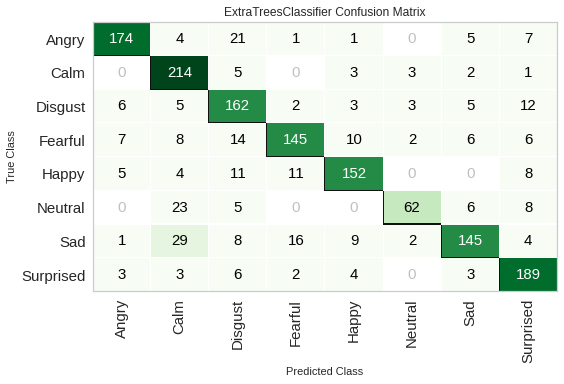

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
plot_model(et, plot = 'confusion_matrix')

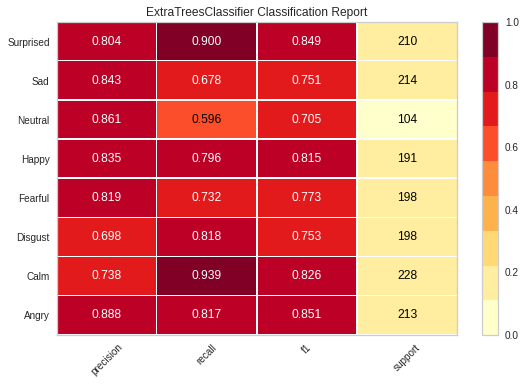

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [18]:
plot_model(et, plot = 'class_report')

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
voter=VotingClassifier(estimators=[("et",et),("lightgbm",lightgbm),("rf",rf)],voting="hard")
X=df_train.iloc[:,:-1]
Y=df_train.iloc[:,-1]
voter.fit(X,Y)
Y_real=df_test.iloc[:,-1]
Y_pred=voter.predict(df_test.iloc[:,:-1])
print(confusion_matrix(Y_real,Y_pred))
print(accuracy_score(Y_real,Y_pred))

[[80  1  5  0  0  1  1  3]
 [ 0 69  0  0  0  1  0  0]
 [ 3  0 61  2  0  1  0  1]
 [ 3  1  0 65  1  0  4  3]
 [ 8  1  0  6 67  1  1  0]
 [ 0  8  2  0  1 22  2  0]
 [ 1  4  1  1  3  1 70  2]
 [ 1  0  4  1  0  1  2 59]]
0.8559027777777778


To conclude, a voting classifier made of extra trees classifier,light gradient boosting machine classifier and random forest classifier gives the best accuracy of 85.59% among all machine learning models on RAVDESS dataset

In [22]:
import pickle
ml_model=pickle.dumps(voter)

In [23]:
pickle.dump(voter, open('ml_model.pkl', 'wb'))